# STA 141B: Midterm (or Super-Homework if you prefer)

### Worth 300 Points

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Ryan

Last Name: Gosiaco

Student ID: 912819444

## Instructions

Please print your answer notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit as the homework solution with your zip file.

For readability you,

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement
- you may add multiple cells between exercise cells

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

## Trans-Atlantic Slave Trade

In this homework, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

Throughout this homework you will need to follow the principles of graphical excellence and the grammar of graphics.  **Use only Plotnine for your graphics**, do not use Pyplot, Seaborn, or Plotly since they do not follow closely the grammar of graphics.  Be sure to include titles and necessary contextual captions.

**Warning:** The Trans-Atlantic Slave Trade remains one of the most horrific abuses of human rights in history.  This homework deals with the numbers behind this forced migration, please be aware that this is a sensitive topic for possibly yourself and others.   A suitable amount of respect and seriousness is required when dealing with this data.

**Exercise 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. There is lots of missingness in this data, and some of these variables are imputed.  We will be imputing some of these variables ourselves, so delete any variable that ends with 'imp'.
3. Open up the pdf file: TAST_codebook.pdf which is the data dictionary for this and other related datasets.  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset.
4. Create a list where you describe the meaning of the columns of your imported dataframe.  You can group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [1]:
import pandas as pd
import numpy as np

tast = pd.read_csv('tastdb-2010.csv', encoding='latin_1', skipinitialspace=True, low_memory=False)

In [2]:
tast.drop(list(tast.filter(regex = 'imp')), axis = 1, inplace = True)

voyageid: id# for each voyage
<br>
evgreen: 1 if the voyage was in the 1999 CD
<br>
shipname: the name of the ship
<br>
national: the country the ship was registered in
<br>
placcons: place where the ship was built
<br>
yrcons: year of when ship was built
<br>
placereg: place where ship was registered
<br>
yrreg: year ship was registered
<br>
rig: rig of ship corresponding to chart in codebook
<br>
tonnage: tonnage of ship
<br>
tonmod: tonnage standardized on British tons
<br>
guns: number of guns mounted
<br>
ownera - ownerp: First to Sixteenth owner of ship
<br>
fate: particular (overall) outcome of voyage
<br>
fate2: outcome of voyage for slaves
<br>
fate3: outcome if vessel captured
<br>
fate4: outcome of voyage for owner
<br>
resistance: African resistance
<br>
plac1tra - plac3tra: First to Third place of slave purchase
<br>
npafttra: port  of call before Atlantic crossing
<br>
sla1port, adpsale1, adpsale2: first to third place of slave landing
<br>
portret: place where voyage ended
<br>
yearam: imputed year of arrival at port where ship left
<br>
Date_dep: date that voyage began
<br>
Date_buy: date that slave purchase began
<br>
Date_leftAfr: date that ship left last slaving port
<br>
Date_land1: date that slaves landed at first place
<br>
Date_depam: date ship left on return voyage
<br>
Date_end: date when voyage completed
<br>
captaina - captainc: First to Third captain's name
<br>
crew1: crew at voyage outset
<br>
crew3: crew at first landing of slaves
<br>
crewdied: # of crew that died during complete voyage
<br>
slintend: slaves intended from first port of purchase
<br>
ncar13, ncar15, ncar17: slaves carried from first, second, and third port of purchase
<br>
tslavesd: total slaves on board at departure from last slaving port
<br>
slaarriv: Total slaves arrived at first port of disembarkation
<br>
slas32. slas36, slas39: slaves disembarked at first, second, and third place
<br>
\*rat7: percentage of \* at departure or arrival
<br>
jamcaspr: avg price of slaves standardized on sterling cash price of prime slaves sold in Jamaica
<br>
vymrtrat: slave mortality rate (slave deaths/slaves embarked)
<br>
sourcea - sourcer: first to eighteenth source of information

**Exercise 2.** First pass at estimating the total number of captives.

1. We will ultimately try to estimate the number of people captured into slavery and forced through the middle passage.  What variable would you use to estimate the total number of captives taken from Africa?  Let me call this variable Var A in this problem statement.   How much of the data for Var A is missing?
2. Create an initial estimate of the total number of captives taken from Africa by assuming that Var A is Missing Completely at Random.  
3. What other variables do you expect to be associated with Var A and why?  Give at least three possibilities.  Which will probably be the most strongly associated with this variable?  (I will be looking for a specific variable to be listed so be sure to think about the most strongly associated one.)

**Part 1**: I would use the variable "tslavesd" which describes total slaves onboard at departure from last slaving port. That variable is missing 8207 entires.

In [5]:
print(tast['tslavesd'].count())
print(len(tast['tslavesd']) - tast['tslavesd'].count())

8207
26734


**Part 2**: The initial estimate for the total number of captives taken from Africa is 2,717,384.

In [6]:
var_a = tast['tslavesd'].sum()
var_a

2717383.5555555555

**Part 3**: I think that the variables: "yearam", "resistance", and "tonnage" would be associated with Var A. I think the  variable "tonnage" would be the most strongly associated with Var A because the more tonnage a ship is, the more slaves that can fit on it. The variable "yearam" would be associated because as slave trade became more widespread, demand would increase for those years. Also, the variable "resistance" would be associated because if there was resistance at the slaving port, then the amount of slaves that they could have taken could be lower.

**Exercise 3.** The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  Subselect the values of `national` that have more than 100 voyages with that value.  
2. Create a DataFrame that filters out the voyages where `national` does not have one of these values.  You should be retaining voyages with only these most common values.
3. Create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year.  Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
5. In this plot, what are the geometric elements and aesthetic mappings?  What other components of the grammar of graphics are you using?
6. Do you observe any abrupt changes in the patterns of these counts for a given flag?  Investigate the cause for this change (using Google, etc.).

In [7]:
#part 1
nat_count = tast['national'].value_counts()
nat_count[nat_count > 100]

7.0     11009
4.0      5303
10.0     4069
9.0      1575
1.0      1249
8.0      1237
5.0       788
11.0      248
Name: national, dtype: int64

In [8]:
#part 2
flag_data = tast[ tast['national'].isin(nat_count[nat_count > 100].index)]

In [9]:
#part 3
flag = ['Great Britain', 'Portugal', 'France', 'U.S.A', 'Spain', 'Netherlands', 'Brazil', 'Denmark']

In [19]:
from plotnine import *

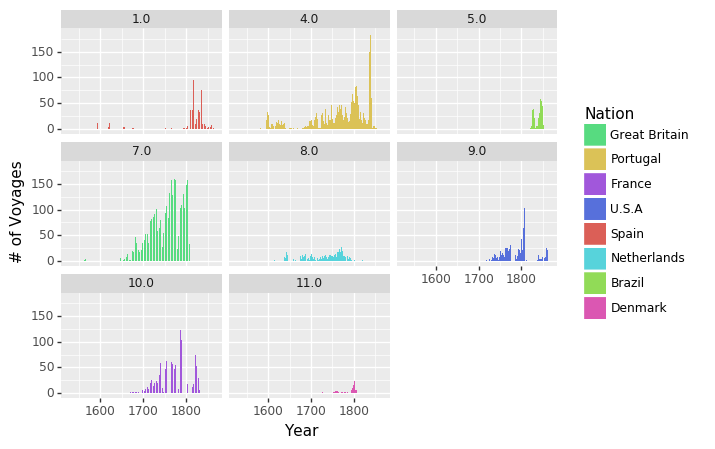

<ggplot: (121820990100)>

In [120]:
#part 4
(ggplot(flag_data, aes(x='yearam', fill='factor(national)'))
 + geom_col(stat='count')
 + facet_wrap('~national')
 + scale_fill_discrete(name='Nation', breaks=[7.0,4.0,10.0,9.0,1.0,8.0,5.0,11.0], labels=flag)
 + labs(x = 'Year', y = '# of Voyages')
)

In [ ]:
In this plot, what are the geometric elements and aesthetic mappings?
What other components of the grammar of graphics are you using?

**Part 5**: The geometric element is "geom_col" which is a bar plot and is based on the count of the variable. The aesthetic mappings are x for year and fill for the color based on the national variable as a factor. Also, facet_wrap separates the stacked plot into subplots based on the nation. scale_fill_discrete allows the legend to be labeled using the flag variable based on the national variable. labs is used to relabel the x and y axis labels.

**Exercise 4.** Looking at some of these ships.

1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described.  How many voyages for this ship are in the data (try to exclude ships with the same name)?
2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.
3. The movie Amistad was based on a real slave ship and slave uprising.  Read about it here: https://en.wikipedia.org/wiki/La_Amistad  Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance.  If you think you found it describe it, otherwise describe the events of another voyage that you did find.  

**Part 1**: There are 15 voyages for the "Brookes" ship in the data. There are a few more entries that have "Brook" in the name but the tonnage is lower than 297 which is the tonnage listed online.

In [20]:
tast[tast['shipname'].str.match('Brook', na=False) & (tast['tonnage'] >= 297.0)]

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
29530,80657,1.0,Brooke,7.0,10433.0,1784.0,10432.0,1800.0,4.0,352.0,...,BT6/235,"MMM, C/EX/L/5/4,1800.042",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29531,80658,1.0,Brooke,7.0,10433.0,1784.0,10432.0,1800.0,4.0,352.0,...,"LList, 30 Mar 1802","LList, 16 Apr 1802","LList, 27 Aug 1802","MMM, C/EX/L/5/4,1800.042",NaN,NaN,NaN,NaN,NaN,NaN
29532,80659,1.0,Brooke,7.0,10433.0,1784.0,10432.0,1800.0,4.0,352.0,...,"MMM, C/EX/L/5/4,1800.042",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29533,80660,1.0,Brooke,7.0,10433.0,1784.0,10432.0,1804.0,4.0,352.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29534,80663,1.0,Brooks,7.0,10432.0,1781.0,10432.0,1781.0,4.0,297.0,...,"LST,1744-1786","Crooks,55","LList, 19 Nov 1782","LList, 25 Feb 1783","Williams,585-86",NaN,NaN,NaN,NaN,NaN
29535,80664,1.0,Brooks,7.0,10432.0,1781.0,10432.0,1783.0,4.0,297.0,...,"LST,1744-1786","Lambert,73,81-101","Lambert,73,109-21","LList, 20 July 1784","LList, 6 Aug 1784","LList, 31 Aug 1784",NaN,NaN,NaN,NaN
29536,80665,1.0,Brooks,7.0,10432.0,1781.0,10432.0,1783.0,4.0,297.0,...,"PP,1789(629),XXIV","Lambert,69,III,Appendix,Jamaica","LList, 31 Jan 1786","LList, 14 Apr 1786","Williams,585",NaN,NaN,NaN,NaN,NaN
29537,80666,1.0,Brooks (a) Brookes,7.0,10432.0,1781.0,10432.0,1786.0,4.0,297.0,...,"PP,1789(629),XXIV","Lambert,68,41-3","cc, 13 Oct 1787","craig,19","LList, 11 Dec 1787","LList, 12 Feb 1788",T70/1476,"Williams,585","Huntington,ST,vol.26,87.11.10.",NaN
29538,80667,1.0,Brooks,7.0,10432.0,1781.0,10432.0,1791.0,4.0,319.0,...,"HLRO,MP,HL,99.06.25","HLRO,MP,HL,1800.07.28","craig,19","LList, 20 Mar 1792",NaN,NaN,NaN,NaN,NaN,NaN
29539,80668,1.0,Brooks,7.0,10432.0,1781.0,NaN,NaN,4.0,319.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Part 2**

In [22]:
revolt = np.where(tast['resistance'] == 1.0, True, False)

In [23]:
revolt

array([False, False, False, ..., False, False, False])

In [126]:
revolt_df = tast[revolt].groupby('yearam', as_index=False).aggregate({'resistance': 'count'})

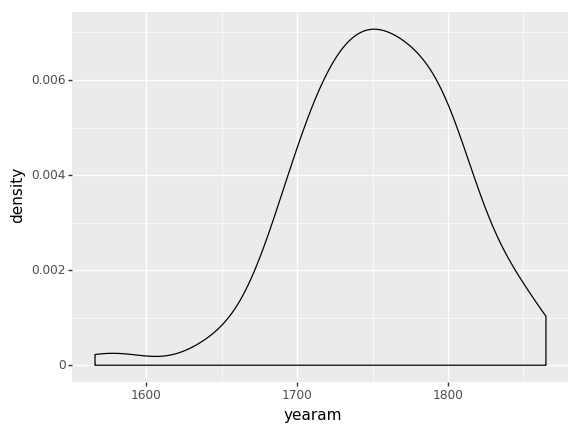

<ggplot: (-9223371915026094676)>

In [144]:
(ggplot(revolt_df, aes(x='yearam'))
 + geom_density(y='resistance')
)

In [146]:
no_revolt_df = tast[~revolt].groupby('yearam', as_index=False).aggregate({'resistance': 'count'})

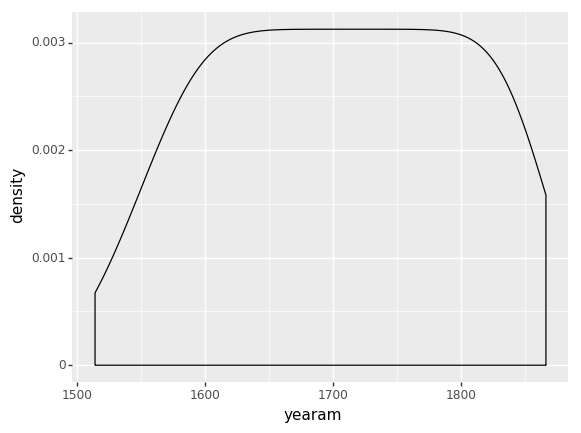

<ggplot: (-9223371915026589615)>

In [147]:
(ggplot(no_revolt_df, aes(x='yearam'))
 + geom_density(y='resistance')
)

**Part 3**: The Amistad ship seems to be listed under "Amistad Habanera". Oddly enough, the ships that match the name Amistad do not seem to have an entry for the resistance variable so I am unsure why that is.

In [189]:
tast[tast['shipname'].str.match('Amistad', na=False)]

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,death_rate
769,774,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,940,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,964,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1178,1196,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,1224,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,1273,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1278,1296,1.0,Amistad Habanera,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8225,14622,1.0,Amistad,1.0,NaN,NaN,NaN,NaN,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8258,14656,1.0,Amistad,1.0,NaN,NaN,NaN,NaN,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8341,14742,1.0,Amistad,1.0,NaN,NaN,NaN,NaN,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Exercise 5.** Other patterns.

1. The arrival and departure locations are quite detailed.  Look in the appendix of the codebook for the location codes.  Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,  
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.
2. Plot the trend of voyages as a function of arrival location.  What trends do you see?
3. Do the same for departure location.
4. Plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.  Also include in the plot another possible confounding variable.
5. Describe the geoms, aesthetic mappings, and other aspects of the plot.

In [149]:
#last dep &  first arriv
#plac1tra arrive
#sla1port departure
# 1,2,3,4,5,6,8

In [156]:
arrival = pd.DataFrame(np.floor(tast['sla1port']/10000).value_counts().sort_index())

In [33]:
import matplotlib.pyplot as plt

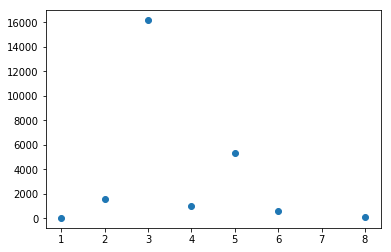

In [34]:
plt.scatter(x=arrival.index, y=arrival)

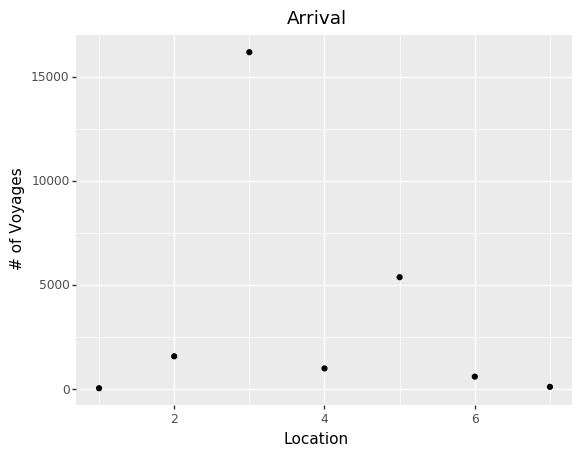

<ggplot: (121828187526)>

In [172]:
(ggplot(arrival, aes(x=range(1,8), y='sla1port'))
 + geom_point()
 + labs(title='Arrival', x = 'Location', y = '# of Voyages')
)

In [167]:
departure = pd.DataFrame(np.floor(tast['plac1tra']/10000).value_counts().sort_index())

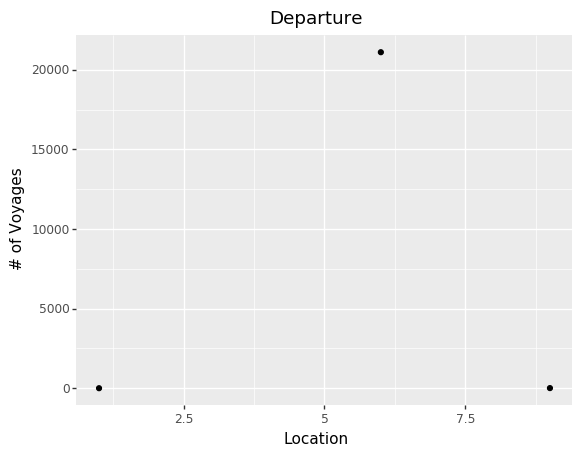

<ggplot: (121821041535)>

In [171]:
(ggplot(departure, aes(x=[1.0,6.0,9.0], y='plac1tra'))
 + geom_point()
 + labs(title='Departure', x = 'Location', y = '# of Voyages')
)

In [37]:
#Plot the ratio of captives that are men as a function of year. 
#Include a smoother to describe the over all trend. 
#Also include in the plot another possible confounding variable.

In [173]:
ratio = tast.groupby('yearam', as_index=False).aggregate({'malrat7': 'sum'})

In [176]:
ratio['malrat7'] = ratio['malrat7']/ratio['malrat7'].max()

C:\Users\origamitoaster\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


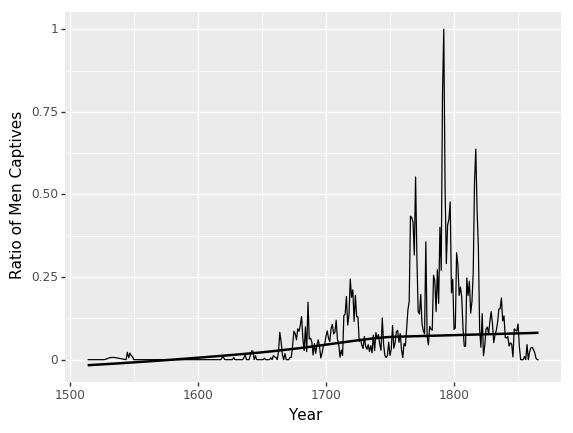

<ggplot: (121821021525)>

In [179]:
(ggplot(ratio, aes(x='yearam', y='malrat7'))
 + geom_line()
 + labs(x = 'Year', y= 'Ratio of Men Captives')
 + geom_smooth()
)

**Exercise 6.** Estimating total captives count I.

1. Plot the number of slaves at departure from last slaving and the number that arrived at the first port of disembarkation.  
2. Why do these variables concentrate near a line?  Most of the data lies on one side of the line, but a small fraction do not, what could have happened for those that did not?  Separate the data into these two populations.
3. For those voyages where the number of captives decreased (through death), calculate a death rate (ratio of captives that died).  
4. Plot this death rate as a function of year.  Make any appropriate scale transformations, and include a trend line or other smoother.  What is your interpretation?
5. Guess at two possible predictors and create visualizations that give you a sense of their association with the death rate.  Make sure that one of these is categorical, and plot it with the death rate and year so that there are three variables used in the same plot.
6. For these plots, list the geoms, aesthetic mappings, scales, and other notable aspects used.

C:\Users\origamitoaster\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 29136 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


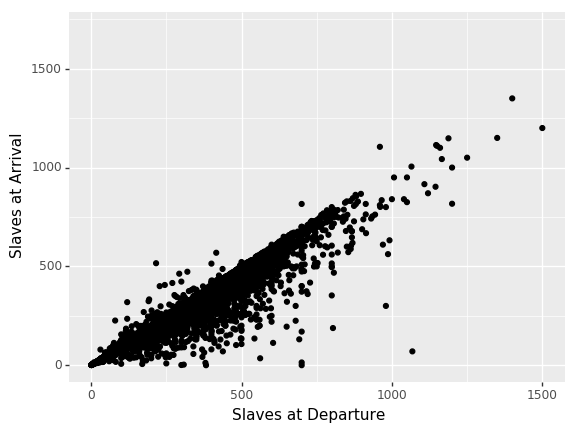

<ggplot: (121828741405)>

In [182]:
(ggplot(tast, aes(x='tslavesd', y='slaarriv'))
 + geom_point()
 + labs(x = 'Slaves at Departure', y = 'Slaves at Arrival')
)

**Part 2**: These variables are concentrated near a line because ideally the number of slaves at departure would be the same as the number of slaves at arrival. Hence, the data is concentrated around the line y=x. For the small fraction of data that lies above the line, the number of slaves on arrival could have increased from rescuing slaves from other slaving ships or it could be that some of the slaves were pregnant.

**Part 4**: The death rate seems to increase each year as the demand for slaves increased. As the demand for slaves increased, slave ships were more packed and as such, disease and other unhygenic conditions resulted in a high mortality rate.

In [46]:
tast['death_rate'] = tast['slaarriv'] / tast['tslavesd']

In [48]:
dr_year = tast[tast['death_rate'] < 1.0].groupby('yearam', as_index=False).aggregate({'death_rate': 'sum'})

In [49]:
dr_year['death_rate'] = dr_year['death_rate']/dr_year['death_rate'].max()

C:\Users\origamitoaster\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


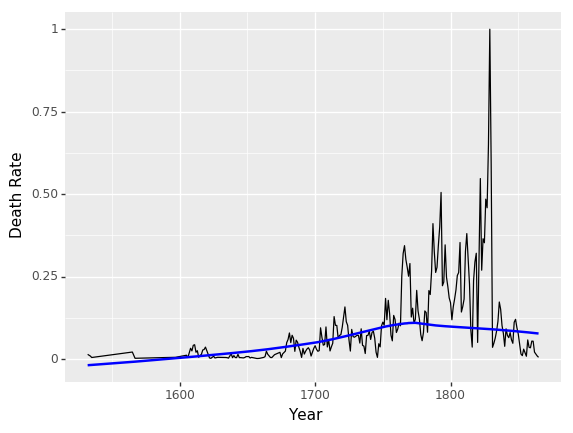

<ggplot: (-9223371915026530374)>

In [180]:
(ggplot(dr_year, aes(x='yearam', y='death_rate')) 
 + geom_line() 
 + stat_smooth(color='blue')
 + labs(x = 'Year', y = 'Death Rate')
)

In [66]:
guns = tast.groupby('yearam', as_index=False).aggregate({'guns': 'sum'})

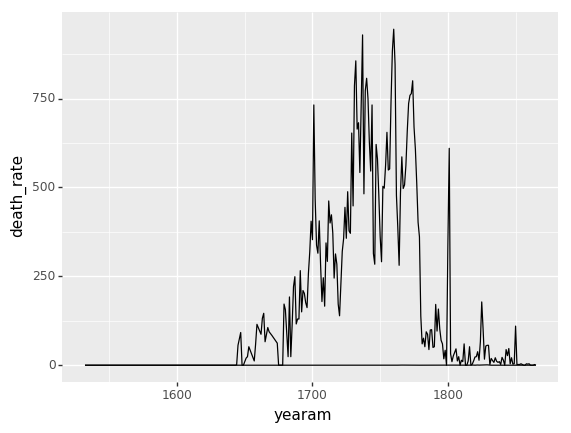

<ggplot: (-9223371915033715568)>

In [89]:
(ggplot(df, aes(x='yearam', y='death_rate')) 
 + geom_line(aes(x='yearam', y='death_rate')) 
 + geom_line(aes(x='yearam', y='guns')) 
)

In [90]:
df = pd.melt(df, id_vars='yearam')

**Part 6**: For the first plot, I used geom_point and labs to label the axis. For the death rate plot, I used geom_line, stat_smooth to create a smoothed line, and labs to label the axis.

**Exercise 7.** Estimating total captives count II.

1. Using the variables selected, fit a prediction of death rate using linear regression and some simple transformations/scales.  You do not need to spend time doing automated model selection, just include the most likely predictor or predictors from the previous question.
2. We will impute the number of captives on board at departure, so enumerate the cases for missingness of the variables involved in the prediction.
3. We would like to predict the number of captives on departure from the number that arrived with the following formula,
$$
\textrm{arrived} = \pi (1 - \textrm{death rate}) \cdot (\textrm{captives taken}) + (1- \pi) (\textrm{average increase})
$$
where $\pi$ is the proportion of voyages with no increase in captives, and the average increase is over those that did see an increase. 
For those voyages with captives taken missing and arrived not missing, use the estimated death rate to predict the captives taken.
4. Impute the remainder by predicting the captives taken with the year variable, you can use simple linear regression.
5. With the same formula and method impute the number of captives upon arrival whenever it is missing.
6. Give a new estimate of the predicted total number of captives taken on the middle passage, the total number of deaths, and the overall death rate.  How does this differ from your first estimate obtained by assuming MCAR?